In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# 9. College data set

In [2]:
college = pd.read_csv('../data/College.csv', index_col=0).dropna()
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
college.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

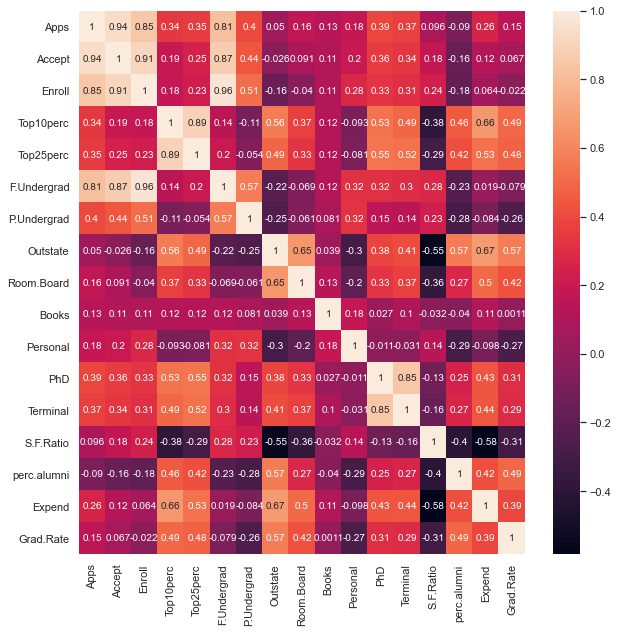

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.heatmap(college.corr(), annot=True, ax=ax);

In [7]:
# convert 'Private' to qualitative
college['Private'] = college['Private'].map({'Yes': 1, 'No': 0})
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [10]:
# 9.a
from sklearn.model_selection import train_test_split
X, y = college.drop(columns=['Apps']), college.Apps
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# sklearn imports
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [13]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)
X_train_scaled[:2,]

array([[-1.66241883, -0.36665088, -0.30549464, -0.87518224, -1.55787255,
        -0.30189133, -0.44584342, -1.49541985, -1.31116256,  0.31699714,
        -0.16829723, -2.39987628, -3.09384961,  0.57820251, -1.03551167,
        -1.03478025, -0.30078181],
       [ 0.60153313, -0.52820612, -0.56682189, -0.25041791,  0.06432632,
        -0.39832388,  0.07781403, -0.12042589,  1.18176268,  1.53001883,
         0.27447505, -0.3928299 , -0.56812266,  0.07162271,  0.44352608,
        -0.68648177, -0.07341053]])

In [37]:
# 9.b Linear model
lin_reg = LinearRegression().fit(X_train_scaled, y_train)
mse_lin = mean_squared_error(y_test, lin_reg.predict(X_test_scaled))
mse_lin, np.sqrt(mse_lin)

(1714561.7191748442, 1309.4127382818774)

In [47]:
# 9.c Ridge reg. with CV
alphas=10**np.linspace(-2, 5, 100)
ridge_cv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error',
                   cv=None, # performs LOO cv efficiently
                   store_cv_values=True # LOO MSE, shape= (n_samples, n_alphas)
                  )
ridge_cv.fit(X_train_scaled, y_train)
ridge_cv.alpha_, ridge_cv.best_score_

(0.01, -1242653.960621692)

In [48]:
# test error
ridge_reg = Ridge(alpha=ridge_cv.alpha_).fit(X_train_scaled, y_train)
mse_rid = mean_squared_error(y_test, ridge_reg.predict(X_test_scaled))
mse_rid, np.sqrt(mse_rid)

(1714372.5209149553, 1309.3404908254213)

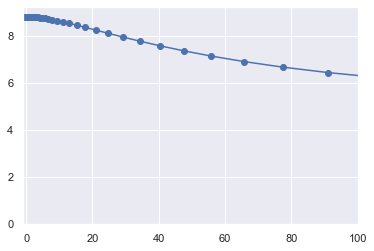

In [49]:
# plot CV MSEs vs. alphas
ridge_cv_scores = np.mean((ridge_cv.cv_values_)*-1, axis=0)
plt.plot(alphas, ridge_cv_scores, 'b-o')
plt.xlim([-1, 100]);

Above plot doesn't make sense. I was expecting something like a u-shaped curve with a minimum at 0.01

In [52]:
# 9.d Lasso with CV
lasso_cv = LassoCV(alphas=alphas)
lasso_cv.fit(X_train_scaled, y_train)
lasso_cv.alpha_

0.01

In [53]:
lasso_reg = Lasso(alpha=lasso_cv.alpha_).fit(X_train_scaled, y_train)
mse_las = mean_squared_error(y_test, lasso_reg.predict(X_test_scaled))
mse_las, np.sqrt(mse_las)

(1714524.5695282014, 1309.3985525913038)

In [59]:
lasso_reg.coef_

array([-287.80203525, 4103.10661663, -902.70640411,  910.2687095 ,
       -295.64418649,  257.36319512,  -33.45897439, -285.88800424,
        175.57042007,   18.60865786,   25.394671  , -171.34691183,
        -21.15440899,   19.50114528,   -6.30153219,  216.73343184,
        150.62312398])

NONE of the coeffificents are set to zeros. Not surprising since alpha=0.01

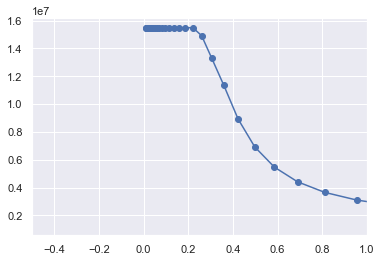

In [58]:
lasso_cv_scores = np.mean(lasso_cv.mse_path_, axis=1)
plt.plot(alphas, lasso_cv_scores, 'b-o')
plt.xlim([-.5, 1])
plt.show();

Like the Ridge plot above, this lasso plot doesn't make sense too. Why isn't a alpha corresponing to smaller value of test MSE chosen?

In [76]:
# let's do k-fold cross-validation manually
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
lasso_reg = Lasso()
alpha_mse = []
for a in alphas:
    lasso_reg.set_params(alpha=a)
    mse = []
    for train_idx, valid_idx in kf.split(X_train):
        #print(X_train.iloc[train_idx].shape, X_train.iloc[valid_idx].shape)
        lasso_reg.fit(X_train.iloc[train_idx], y_train[train_idx])
        y_valid_pred = lasso_reg.predict(X_train.iloc[valid_idx])
        mse.append(mean_squared_error(y_train[valid_idx], y_valid_pred))
    alpha_mse.append(np.mean(mse))

In [77]:
alphas[np.argmin(alpha_mse)]

7.92482898353917

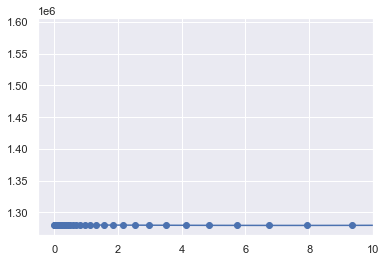

In [78]:
plt.plot(alphas, alpha_mse, 'b-o')
plt.xlim([-.5,10]);

It's a pretty flat curve. So does it really matter which alpha we choose? is that why LassoCV chooses an alpha of 0.01? Let's look at test error with alpha=7.92

In [87]:
lasso_reg = Lasso(alpha=7.92)
lasso_reg.fit(X_train, y_train)
mse = mean_squared_error(y_test, lasso_reg.predict(X_test))
mse, np.sqrt(mse)

(1480167.3523807102, 1216.6212855201532)

### 9.e PCR with CV to choose best n_components

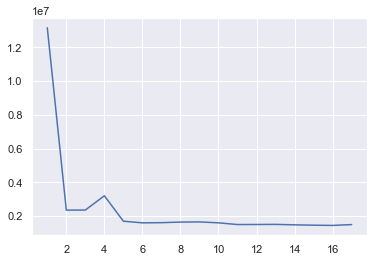

In [99]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
lin_reg = LinearRegression()
n_componnets = len(X_train_pca[0])
mses = []
for n in range(1, n_componnets+1):
    lin_reg.fit(X_train_pca[:, :n], y_train)
    mse = mean_squared_error(y_test, lin_reg.predict(X_test_pca[:, :n]))
    mses.append(mse)
plt.plot(range(1, n_componnets+1), mses);

In [100]:
np.argmin(mses)

15

PCA CV suggests to use all most all the components. However, since the test MSE curve is pretty flat, any n_componnets > 5 seems to do the job. Letts choose 5 components.

In [102]:
lin_reg.fit(X_train_pca[:, :6], y_train) # re-train with 5 components ONLY
mse_pca = mean_squared_error(y_test, lin_reg.predict(X_test_pca[:, :6]))
mse_pca, np.sqrt(mse_pca)

(1595159.4428102644, 1262.9962164671217)

#### 9.f PLS regression
TODO

#### 9.g comments

In [103]:
np.sqrt(mse_lin), np.sqrt(mse_rid), np.sqrt(mse_las), np.sqrt(mse_pca)

(1309.4127382818774,
 1309.3404908254213,
 1309.3985525913038,
 1262.9962164671217)

As RMSE scores above indicate, all models perform about the same. Choosing a larger value of alpha seems to give slightly better RMSE scores for Ridge and Lasso. However, CV selected alphas for both Ridge and Lasso are 0.01, making these pretty close to OLS.

# 11 Boston data set

In [105]:
boston = pd.read_csv('../data/Boston.csv', index_col=0).dropna()
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


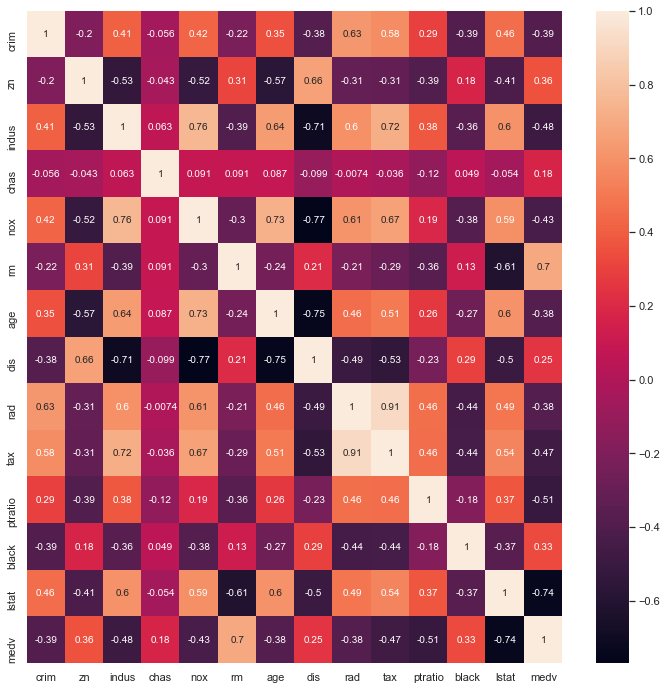

In [107]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
sns.heatmap(boston.corr(), annot=True, ax=axb);

In [108]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


Although there are some categorical variables, they seem to be ordinal and encoded appropriately. Leave these as is.

In [115]:
# train-test splits
X = boston.drop(columns='crim')
y = boston.crim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_idx, test_idx = X_train.index, X_test.index

In [116]:
# scale the predictors
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
print(np.mean(X_train, axis=0))
print(np.std(X_train, axis=0))

[ 0.00000000e+00 -4.17707673e-17  1.31907686e-17 -5.82592280e-16
 -2.04456913e-16 -4.85859977e-16  5.19386514e-17 -9.45338417e-17
 -1.51693839e-16  8.51903806e-16 -4.94653823e-16 -1.79174607e-16
  3.36364600e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## baseline model: OLS

In [120]:
# let's fit OLS model as baseline
import statsmodels.api as sm
X_train_df = pd.DataFrame(X_train, index=train_idx, # sm.OLS errors if y & x indexes don't match
                          columns=boston.columns[1:]) # drop 'crim' predictor
ols_reg = sm.OLS(y_train, sm.add_constant(X_train_df)).fit() # predictor names are lost for X_train
print(ols_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     22.79
Date:                Sun, 03 Jan 2021   Prob (F-statistic):           2.14e-40
Time:                        12:42:59   Log-Likelihood:                -1340.6
No. Observations:                 404   AIC:                             2709.
Df Residuals:                     390   BIC:                             2765.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6091      0.338     10.666      0.0

In [122]:
# test RMSE with OLS
ols_preds = ols_reg.predict(sm.add_constant(X_test))
ols_rmse = np.sqrt(mean_squared_error(y_test, ols_preds))
ols_rmse

4.943882753410977

In [123]:
np.mean(boston.crim), np.mean(y_train), np.mean(y_test)

(3.6135235573122535, 3.609124628712873, 3.630946764705883)

## Feature importance as reported by sklearn's RFE

In [124]:
from sklearn.feature_selection import RFE, RFECV

In [134]:
lin_reg = LinearRegression() # estimator
rfe_selector = RFE(lin_reg, n_features_to_select=5)
rfe_selector.fit(X_train, y_train)
ranks = pd.DataFrame({'ranks': rfe_selector.ranking_,
                     'features': boston.columns[1:]
                     }).sort_values(by='ranks', ascending=False)
ranks

,ranks,features
1,9,indus
11,8,lstat
2,7,chas
5,6,age
4,5,rm
10,4,black
8,3,tax
9,2,ptratio
0,1,zn
3,1,nox


In [137]:
# test rmse with selected features
np.sqrt(mean_squared_error(y_test, 
                           rfe_selector.estimator_.predict(
                               X_test[:, rfe_selector.support_]))) # trainined on 5 selected features only

5.1306530873713365

In [138]:
# what's the test rmse reported by sklearn's LineLinearRegression when trained on all features
preds = LinearRegression().fit(X_train, y_train).predict(X_test)
np.sqrt(mean_squared_error(y_test, preds))

4.943882753410977

observations:
1. test rmse from both sklearn and statsmodels is same.
2. feature importance ranking reported by sklearn is similar to that reported by statsmodels summary.
3. test rmse increases only slightly when training on 5 features vs. all 13 features. 

## Lasso

In [140]:
lasso_cv = LassoCV().fit(X_train, y_train)

In [141]:
lasso_cv.alpha_

0.04748648657973681

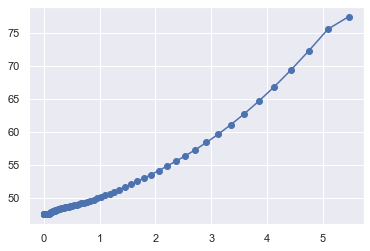

In [150]:
plt.plot(lasso_cv.alphas_, np.mean(lasso_cv.mse_path_, axis=1), 'b-o');

In [151]:
# fit lasso with best alpha
lasso_reg = Lasso(alpha=lasso_cv.alpha_).fit(X_train, y_train)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_reg.predict(X_test)))
lasso_rmse

4.9550158889604266

In [153]:
# lasso with 5 features
lasso_cv5 = LassoCV().fit(X_train[:, rfe_selector.support_], y_train)
print(lasso_cv5.alpha_)
lasso_reg5 = Lasso(alpha=lasso_cv5.alpha_).fit(X_train[:, rfe_selector.support_], y_train)
np.sqrt(mean_squared_error(y_test, lasso_reg5.predict(X_test[:, rfe_selector.support_])))

0.005459792013191309


5.129781337443703

## Ridge

In [154]:
ridge_cv = RidgeCV(alphas=lasso_cv.alphas_).fit(X_train, y_train)
ridge_cv.alpha_

5.45979201319131

In [155]:
ridge_reg = Ridge(alpha=ridge_cv.alpha_).fit(X_train, y_train)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_reg.predict(X_test)))
ridge_rmse

4.922747373592014